# Project 4: West Nile Virus Classifer (Part 1)
---

Collaborators from the class of DSIF-11-SG (Jun '23 - Dec '23):
1. Liyena Yusof
2. Maimunah Iskhander
3. Marko Lim
4. Tiffany Tan

---
## Contents
1. [Problem statement](#1.0-Problem-statement)<br>
2. [Data dictionary](#2.0-Data-dictionary)<br>
3. [Cleaning and preprocessing](#3.0-Cleaning-and-preprocessing)<br>
4. [Feature engineering](#4.0-Feature-engineering)<br>
5. [EDA](#5.0-Exploratory-Data-Analysis-(EDA))
---

## 1.0 Problem statement

The Chicago Department of Public Health aims to optimize resource allocation and improve public health outcomes by evaluating the impact of interventions, such as spraying, on reducing the prevalence of West Nile virus. The objective is to develop data-driven strategies for efficient resource allocation and effective prevention measures to safeguard the health of the local population.

## How was the data collected?

Every year from late-May to early-October, public health workers in Chicago setup mosquito traps scattered across the city. Every week from Monday through Wednesday, these traps collect mosquitoes, and the mosquitoes are tested for the presence of West Nile virus before the end of the week. The test results include the number of mosquitoes, the mosquitoes species, and whether or not West Nile virus is present in the cohort.

## Success Metrics

<b>AUC ROC</b>: Predict probability that the West Nile Virus is present and observed outcomes  

### Reference Websites

1.   [Centers For Disease Control and Prevention](https://www.cdc.gov/about/index.html)
2.   [Chicago Department of Public Health](https://www.chicago.gov/city/en/depts/cdph.html)
3. [John Hopkins Medicine](https://www.hopkinsmedicine.org/health/conditions-and-diseases/west-nile-virus#:~:text=West%20Nile%20virus%20is%20spread%20to%20humans%20through%20the%20bite,species%20also%20have%20the%20virus)
4. [Real-Time Rt-Pcr Assays To Detect West Nile Virus In Mosquito Pools](https://elischolar.library.yale.edu/cgi/viewcontent.cgi?article=1123&context=ysphtdl)
5. [mosquitoes culex life cycles](https://www.cdc.gov/mosquitoes/pdfs/culexlifecycle-p.pdf)
6. [Incubation period](https://elischolar.library.yale.edu/cgi/viewcontent.cgi?article=1123&context=ysphtdl)




## 2.0 Data dictionary
---

### Weather DataSet

|**Feature**|**Type**|**Description**|**Range**|**Missing Value**|
|---|---|---|---|---|
|station|int64|Station number|either 1 or 2 |No Missing value|
|date|object|Date of record|2007-05-01 to 2014-10-31|No Missing value|
|tmax|int64|Max temperature in Degrees Fahrenheit|41 to 104|No Missing value|
|tmin|int64|Min temperature in Degrees Fahrenheit|29 to 83|No Missing value|
|tavg|object|Avg temperature in Degrees Fahrenheit|36 to 94|'M'|
|depart|object|Temp departure from normal in Degrees Fahrenheit|-16 to 23|'M'|
|dewpoint|int64|Avg Dew Point in Degrees Fahrenheit|22 to 75|No Missing value|
|wetbulb|object|Avg Wet Bulb in Degrees Fahrenheit|32 to 78|'M'|
|heat|object|How much "heating" needed to reach a comfortable baseline of 65°F SEASON BEGINS WITH JULY) |0 to 29|'M'|
|cool|object|How much "cooling" needed to reach a comfortable baseline of 65°F (SEASON BEGINS WITH JANUARY) |0 to 29|'M'|
|Sunrise|object|Time of Sunrise (Calculated, not observed)|0416 to 0623|'-'|
|Sunset|object|Time of Sunset (Calculated, not observed)|1647 to 1931|'-'|
|CodeSum|object|Weather Phenomena|refer to CodeSum Legend below|' '|
|depth|object|Snow/ice in inches|0|'M'|
|Water1|object|Water equivalent of Depth|no value|'M'|
|snowfall|object|Snowfall in inches and tenths|0 to 0.1|'M','T'|
|PrecipTotal|object|Rainfall and melted snow in inches and hundredths|0 to 6.86|'M',' T'|
|StnPressure|object|Average station pressure in inches of HG|28.59 to 29.71|'M'|
|SeaLevel|object|Average sea level pressure in inches of HG|29.23 to 30.39|'M'|
|ResultSpeed|float64|Resultant wind speed in miles per hour|0.1 to 24.1|No Missing value|
|resultdir|int64|Resultant wind direction in Degrees|1 to 36|No Missing value|
|AvgSpeed|object|Avg wind speed in miles per hour|4.9 to 23.1|'M'|

T = trace (in meteorology, it demotes an amount of precipitation, such as rain or snow, that is greater than zero, but is too small to be measured by standard units or methods of measurement) <br>

M = Missing Data, or data that are not normally reported for the station. <br>

'-' = values not available for sunrise/sunset. <br>

### CodeSum

| **code** | **explanation** |
|---|---|
| +FC | TORNADO/WATERSPOUT |
| FC | FUNNEL CLOUD |
| TS | THUNDERSTORM |
| GR | HAIL |
| RA | RAIN |
| DZ | DRIZZLE |
| SN | SNOW |
| SG | SNOW GRAINS |
| GS | SMALL HAIL &/OR SNOW PELLETS |
| PL | ICE PELLETS |
| IC | ICE CRYSTALS |
| FG+ | HEAVY FOG (FG & LE.25 MILES VISIBILITY) |
| FG | FOG |
| BR | MIST |
| UP | UNKNOWN PRECIPITATION |
| HZ | HAZE |
| FU | SMOKE |
| VA | VOLCANIC ASH |
| DU | WIDESPREAD DUST |
| DS | DUSTSTORM |
| PO | SAND/DUST WHIRLS |
| SA | SAND |
| SS | SANDSTORM |
| PY | SPRAY |
| SQ | SQUALL |
| DR | LOW DRIFTING |
| SH | SHOWER |
| FZ | FREEZING |
| MI | SHALLOW |
| PR | PARTIAL |
| BC | PATCHES |
| BL | BLOWING |
| VC | VICINITY |
| - | LIGHT |
| + | HEAVY |
| NO SIGN | MODERATE |


### Spray DataSet

|**Feature**|**Type**|**Description**|**Range**|**Missing Value**|
|---|---|---|---|---|
|date|object|Date of the spray|2011-08-29 to 2013-09-05|No Missing value|
|time|object|Time of the spray|6:56:58 PM to 8:04:21 PM|584 missing value|
|latitude|float64|Latitude returned from GeoCoder|42.39162333 to 42.004805|No Missing value|
|longitude|float64|Longitude returned from GeoCoder|-88.08916333 to -87.81746|No Missing value|

### Train DataSet

10506 rows, 12 columns

|**Feature**|**Type**|**Description**|**Range**|**Missing Value**|
|---|---|---|---|---|
|date|object|Date that the WNV test was performed|2007-05-29 to 2013-09-26|No Missing value|
|address|object|Approximate address (total count 138)|Not applicable|No Missing value|
|species|object|Types of mosquitos|7 types of mosquito|No Missing value|
|block|int64|Block number of address (total count 64)|11-98|No Missing value|
|street|object|Street name (total count 128)|Not applicable|No Missing value|
|trap|object|Trap ID (total number of trap 136)|T002 to T054C|No Missing value|
|addressnumberandstreet|object|Address number and street (total count 138)|Not applicable|No Missing value|
|latitude|float64|Latitude (total count 138)|41.644612 to 42.01743|No Missing value|
|longitude|float64|Longitude (total count 138)|-87.930995 to-87.531635|No Missing value|
|addressaccuracy|int64|Accuracy returned from GeoCoder|9, 8, 5, 3|No Missing value|
|nummosquitos|int64|Number of mosquitoes found in trap|1 to 50|No Missing value|
|wnvpresent|int64|Whether West Nile was present in mosquitos, 1 means present, 0 means not present|0 to 1|No Missing value|

note: total count represent total count of unique value

### Test Dataset

|**Feature**|**Type**|**Description**|**Range**|**Missing Value**|
|---|---|---|---|---|
|id|int64|ID record|1 to 116293|No Missing value|
|date|object|Date that the WNV test was performed|2008-06-11 to 2014-10-02|No Missing value|
|address|object|Approximate address (total count 151)|Not applicable|No Missing value|
|species|object|Types of mosquitos|8 types of mosquito|No Missing value|
|block|int64|Block number of address|10-98|No Missing value|
|street|object|Street name (total count 139)|Not applicable|No Missing value|
|trap|object|Trap ID (total count 149)|T002 to T054C|No Missing value|
|addressnumberandstreet|object (total count 151)|Address number and street|Not applicable|No Missing value|
|latitude|float64|Latitude (total count 151)|41.644612 to 42.01743|No Missing value|
|longitude|float64|Longitude (total count 151)|-87.930995 to -87.531635|No Missing value|
|addressaccuracy|int64|Accuracy returned from GeoCoder|9, 8, 5, 3|No Missing value|

note: total count represent total count of unique value

# 3.0 Cleaning and preprocessing

#### Import Libraries

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import math

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Map, Marker, Icon
from folium.plugins import HeatMap
from folium import MacroElement
from jinja2 import Template
import geopy.distance


#### Read in the Datasets

In [2]:
train_df = pd.read_csv('../datasets/train.csv')
test_df = pd.read_csv('../datasets/test.csv')
spray_df = pd.read_csv('../datasets/spray.csv')
weather_df = pd.read_csv('../datasets/weather.csv')

## 3.1.0 Cleaning & Preprocessing on train data set & test data set

### 3.1.1 Exploring train data set

In [3]:
train_df.shape

(10506, 12)

In [4]:
train_df[train_df.duplicated()].shape

(813, 12)

In [5]:
train_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [7]:
train_df.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [8]:
train_df.describe().sort_values('std',axis=1)

,Longitude,Latitude,WnvPresent,AddressAccuracy,NumMosquitos,Block
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,-87.699908,41.841139,0.052446,7.819532,12.853512,35.687797
std,0.096514,0.112742,0.222936,1.452921,16.133816,24.339468
min,-87.930995,41.644612,0.000000,3.000000,1.000000,10.000000
25%,-87.760070,41.732984,0.000000,8.000000,2.000000,12.000000
50%,-87.694991,41.846283,0.000000,8.000000,5.000000,33.000000
75%,-87.627796,41.954690,0.000000,9.000000,17.000000,52.000000
max,-87.531635,42.017430,1.000000,9.000000,50.000000,98.000000


### 3.1.2  Drop 'Address' and 'AddressNumberAndStreet' and 'Street' 

In [9]:
# take actions here for train dataset and apply it to the test dataset as well
train_df.drop(columns=['Address', 'AddressNumberAndStreet'], inplace=True)
test_df.drop(columns=['Address', 'AddressNumberAndStreet'], inplace=True)

In [10]:
train_df.head()

,Date,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,9,1,0
1,2007-05-29,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,9,1,0
2,2007-05-29,CULEX RESTUANS,62,N MANDELL AVE,T007,41.994991,-87.769279,9,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,8,1,0
4,2007-05-29,CULEX RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,8,4,0


In [11]:
# Since mosquitos are pooled in groups of 50, add the number of mosquitos & wnvpresent

train_df = train_df.groupby(['Date', 'Species', 'Trap', 'Latitude', 'Longitude','AddressAccuracy','Block']).agg({
    'NumMosquitos': 'sum',  # Summing up the number of mosquitos
    'WnvPresent': 'sum',    # Summing up the WnvPresent column
    'Street': 'first'       # Keeping the first 'Street' value encountered in each group
}).reset_index()

In [12]:
# WnvPresent needs to be mapped to 0 and 1
train_df.sort_values('WnvPresent',ascending=False).head()

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,Block,NumMosquitos,WnvPresent,Street
1450,2007-08-16,CULEX PIPIENS,T115,41.673408,-87.599862,5,12,2532,10,S DOTY AVE
7428,2013-08-01,CULEX PIPIENS/RESTUANS,T900,41.974689,-87.890615,9,10,984,9,W OHARE AIRPORT
7971,2013-08-29,CULEX PIPIENS,T900,41.974689,-87.890615,9,10,281,8,W OHARE AIRPORT
1666,2007-08-22,CULEX PIPIENS,T115,41.673408,-87.599862,5,12,1554,7,S DOTY AVE
1669,2007-08-22,CULEX PIPIENS,T138,41.726465,-87.585413,5,10,1054,6,S STONY ISLAND AVE


In [13]:
# Map values of WnvPresent to 0 or 1
train_df['WnvPresent'] = (train_df['WnvPresent'] > 0).astype(int)

In [14]:
# Check that WnvPresent is binary, either 0 or 1
train_df['WnvPresent'].value_counts()

WnvPresent
0    8018
1     457
Name: count, dtype: int64

### 3.1.3 Extract day, month, year, week and day of week from 'Date' after converting to datetime object

In [15]:
# Create function to create new date related features
def date_features(df):    
    # Convert date to datetime object
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract day, month, year and week to create new features
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Week'] = df['Date'].dt.isocalendar().week # Note: 52 weeks in a year
    df['DayOfWeek'] = df['Date'].dt.dayofweek # Note: Monday = 0, Sunday = 6
    
    return df

In [16]:
train_df = date_features(train_df)
test_df= date_features(test_df)

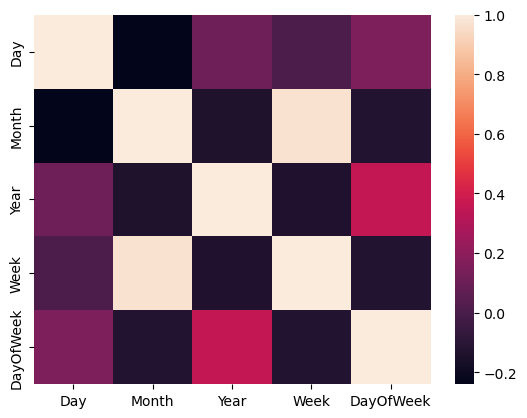

In [17]:
corr = train_df[['Day','Month','Year','Week','DayOfWeek']].corr()
sns.heatmap(corr)
plt.show()

We will use all the columns in our model.

In [18]:
train_df.isnull().sum()

Date               0
Species            0
Trap               0
Latitude           0
Longitude          0
AddressAccuracy    0
Block              0
NumMosquitos       0
WnvPresent         0
Street             0
Day                0
Month              0
Year               0
Week               0
DayOfWeek          0
dtype: int64

In [19]:
# Check that the sum of nummosquitos were done correctly
train_df.sort_values('NumMosquitos', ascending=False)

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,Block,NumMosquitos,WnvPresent,Street,Day,Month,Year,Week,DayOfWeek
1450,2007-08-16,CULEX PIPIENS,T115,41.673408,-87.599862,5,12,2532,1,S DOTY AVE,16,8,2007,33,3
564,2007-07-25,CULEX PIPIENS,T115,41.673408,-87.599862,5,12,2356,1,S DOTY AVE,25,7,2007,30,2
1897,2007-08-28,CULEX PIPIENS,T115,41.673408,-87.599862,5,12,2207,1,S DOTY AVE,28,8,2007,35,1
1190,2007-08-08,CULEX PIPIENS,T138,41.726465,-87.585413,5,10,1658,1,S STONY ISLAND AVE,8,8,2007,32,2
2032,2007-09-05,CULEX PIPIENS,T115,41.673408,-87.599862,5,12,1648,1,S DOTY AVE,5,9,2007,36,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,2009-06-19,CULEX RESTUANS,T138,41.726465,-87.585413,5,10,1,0,S STONY ISLAND AVE,19,6,2009,25,4
3184,2009-06-19,CULEX RESTUANS,T151,41.916265,-87.800515,8,70,1,0,W ARMITAGE AVENUE,19,6,2009,25,4
3189,2009-06-19,CULEX RESTUANS,T200,41.678618,-87.559308,5,13,1,0,S TORRENCE AVE,19,6,2009,25,4
3190,2009-06-19,CULEX RESTUANS,T209,41.740641,-87.546587,5,13,1,0,S BRANDON,19,6,2009,25,4


In [20]:
# Check final shape of train_df
train_df.shape

(8475, 15)

In [21]:
# There are no more duplicated rows!
train_df[train_df.duplicated()]

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,Block,NumMosquitos,WnvPresent,Street,Day,Month,Year,Week,DayOfWeek


In [22]:
# Check final shape of test_df
test_df.shape

(116293, 14)

In [23]:
# Change all the column names to lowercase
train_df.columns = train_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()

In [24]:
train_df.columns

Index(['date', 'species', 'trap', 'latitude', 'longitude', 'addressaccuracy',
       'block', 'nummosquitos', 'wnvpresent', 'street', 'day', 'month', 'year',
       'week', 'dayofweek'],
      dtype='object')

### 3.2.0 Exploring Spray Dataset

In [25]:
spray_df.shape

(14835, 4)

In [26]:
spray_df[spray_df.duplicated()].shape

(541, 4)

In [27]:
spray_df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [28]:
spray_df.describe()

,Latitude,Longitude
count,14835.000000,14835.000000
mean,41.904828,-87.736690
std,0.104381,0.067292
min,41.713925,-88.096468
25%,41.785001,-87.794225
50%,41.940075,-87.727853
75%,41.980978,-87.694108
max,42.395983,-87.586727


In [29]:
spray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [30]:
spray_df.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

###  3.2.1 Drop null rows in 'Time' column since there isn't much variability in time

In [31]:
# Drop the null rows in 'Time' column
spray_df = spray_df.dropna(subset=['Time']).reset_index(drop=True)

In [32]:
spray_df = date_features(spray_df)
spray_df.head()

,Date,Time,Latitude,Longitude,Day,Month,Year,Week,DayOfWeek
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,29,8,2011,35,0
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,29,8,2011,35,0
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,29,8,2011,35,0
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,29,8,2011,35,0
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,29,8,2011,35,0


In [33]:
spray_df.columns = spray_df.columns.str.lower()
spray_df.head()

,date,time,latitude,longitude,day,month,year,week,dayofweek
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,29,8,2011,35,0
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,29,8,2011,35,0
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,29,8,2011,35,0
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,29,8,2011,35,0
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,29,8,2011,35,0


In [34]:
# Check final shape of spray_df
spray_df.shape

(14251, 9)

### 3.3.0 Exploring Weather Dataset

In [35]:
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [36]:
weather_df.describe().sort_values('std',axis=1)

,Station,ResultSpeed,ResultDir,Tmin,DewPoint,Tmax
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,6.960666,17.494905,57.810462,53.457880,76.166101
std,0.500085,3.587527,10.063609,10.381939,10.675181,11.461970
min,1.000000,0.100000,1.000000,29.000000,22.000000,41.000000
25%,1.000000,4.300000,7.000000,50.000000,46.000000,69.000000
50%,1.500000,6.400000,19.000000,59.000000,54.000000,78.000000
75%,2.000000,9.200000,25.000000,66.000000,62.000000,85.000000
max,2.000000,24.100000,36.000000,83.000000,75.000000,104.000000


In [37]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [38]:
# There does not seem to be any null values.
weather_df.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [39]:
# Check out what values PrecipTotal has
weather_df['PrecipTotal'].value_counts()

PrecipTotal
0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
        ... 
3.64       1
4.73       1
1.60       1
2.24       1
1.18       1
Name: count, Length: 168, dtype: int64

### 3.3.1  Exploring for missing (' ') in weather dataset 

In [40]:
# Calculate percentage of required char in affected columns
def missing(char):
    vals = (weather_df == char).sum()
    return 100*vals[vals > 0]/len(weather_df)

In [41]:
# There are empty strings.
missing(' ')

CodeSum    54.653533
dtype: float64

### 3.3.2  Exploring for missing ('-') in weather dataset 

In [42]:
# There are also '-' values as cited in the documentation.
missing('-')

Sunrise    50.0
Sunset     50.0
dtype: float64

### 3.3.3  Exploring for missing ('-') in weather dataset 

In [43]:
# There are also 'M' values as cited in the documentation.
missing('M')

Tavg             0.373641
Depart          50.000000
WetBulb          0.135870
Heat             0.373641
Cool             0.373641
Depth           50.000000
Water1         100.000000
SnowFall        50.000000
PrecipTotal      0.067935
StnPressure      0.135870
SeaLevel         0.305707
AvgSpeed         0.101902
dtype: float64

In [44]:
# All '-' values come from Station 2
weather_df[weather_df['Station']==2][['Station','Sunrise','Sunset']].value_counts()

Station  Sunrise  Sunset
2        -        -         1472
Name: count, dtype: int64

### 3.3.4  Exploring for missing (' T') in weather dataset 

In [45]:
# There are also 'T' values as cited in the documentation.
missing('  T')

SnowFall        0.407609
PrecipTotal    10.801630
dtype: float64

### 3.3.5  Exploring for missing (' T') in weather dataset 

In [46]:
weather_df[weather_df['Tavg']=='M'][['Tavg','Tmin','Tmax']]

,Tavg,Tmin,Tmax
7,M,51,78
505,M,46,86
675,M,46,62
1637,M,71,100
2067,M,72,84
2211,M,42,71
2501,M,52,91
2511,M,53,84
2525,M,48,76
2579,M,47,80


In [47]:
weather_df[['Tavg','Tmin','Tmax']]

,Tavg,Tmin,Tmax
0,67,50,83
1,68,52,84
2,51,42,59
3,52,43,60
4,56,46,66
...,...,...,...
2939,45,40,49
2940,42,32,51
2941,45,37,53
2942,40,33,47


In [48]:
# Calculate the average temperature from Tmin and Tmax
# Trend is to round up the value
# We can use the same technique to impute the missing values in Tavg
0.5 * weather_df['Tmin'] + 0.5 * weather_df['Tmax']

0       66.5
1       68.0
2       50.5
3       51.5
4       56.0
        ... 
2939    44.5
2940    41.5
2941    45.0
2942    40.0
2943    41.5
Length: 2944, dtype: float64

<b>Actions to be taken on weather dataset</b>
1. Extract day, month, year, day of the week after converting 'Date' to datetime object.
2. Replace 'M' values in 'Tavg' column using the average from 'Tmin' and 'Tmax' and rounding it up.
3. Using forward fill to replace 'M' values in 'WetBulb', 'Heat, 'Cool', 'PrecipTotal', 'StnPressure', 'SeaLevel' and 'AvgSpeed' columns to maintain temporal consistency in the weather data.
4. For 'PrecipTotal', convert to boolean values, either 'Y' or 'N' for presence of precipitation.



### 3.3.6 Impute 'Sunrise' and 'Sunset' missing values in Station 2 using forward fill.

In [49]:
# Drop the columns where there are more than 30% missing values
drop_list = ['CodeSum','Depart','SnowFall','Water1','Depth']
weather_df.drop(columns=drop_list, inplace=True)

In [50]:
# Perform imputation

weather_df['Sunrise'].replace('-', np.nan, inplace=True)
weather_df['Sunset'].replace('-', np.nan, inplace=True)
weather_df['Sunrise'] = weather_df['Sunrise'].fillna(method='ffill')
weather_df['Sunset'] = weather_df['Sunset'].fillna(method='ffill')

weather_df['PrecipBool'] = weather_df['PrecipTotal'].apply(lambda x: 'N' if x=='0.00' else 'Y')
weather_df['PrecipTotal'] = weather_df['PrecipTotal'].apply(lambda x: 0.00 if str(x).strip()=='T' or pd.isnull(x) else x)
weather_df['PrecipBool'] = weather_df['PrecipBool'].apply(lambda x: 1 if x=='Y' else 0)

# Replace 'M' values with calculated rounded up average
weather_df.loc[weather_df['Tavg'] == 'M', 'Tavg'] = ((weather_df['Tmax'] + weather_df['Tmin']) / 2).round().astype(int)

# Replace other 'M' values with Nan then use forward fill
weather_df = weather_df.replace('M', np.nan).fillna(method='ffill')

In [51]:
# Check that imputation has been done correctly for 'Sunrise' and 'Sunset' columns
weather_df[['Station','Sunrise','Sunset']]

,Station,Sunrise,Sunset
0,1,0448,1849
1,2,0448,1849
2,1,0447,1850
3,2,0447,1850
4,1,0446,1851
...,...,...,...
2939,2,0620,1650
2940,1,0622,1649
2941,2,0622,1649
2942,1,0623,1647


In [52]:
weather_df.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'PrecipBool'],
      dtype='object')

In [53]:
# Create date related features for weather data
weather_df = date_features(weather_df)

In [54]:
# Use lowercase names for columns
weather_df.columns = weather_df.columns.str.lower()

In [55]:
# Cast all the original mixed types columns to float
object_cols = weather_df.select_dtypes(include='object').columns
object_cols

for col in object_cols:
    weather_df[col] = weather_df[col].astype(float)

In [56]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   float64       
 5   dewpoint     2944 non-null   int64         
 6   wetbulb      2944 non-null   float64       
 7   heat         2944 non-null   float64       
 8   cool         2944 non-null   float64       
 9   sunrise      2944 non-null   float64       
 10  sunset       2944 non-null   float64       
 11  preciptotal  2944 non-null   float64       
 12  stnpressure  2944 non-null   float64       
 13  sealevel     2944 non-null   float64       
 14  resultspeed  2944 non-null   float64       
 15  resultdir    2944 non-null   int64         
 16  avgspe

### 3.4.0 Merging Datasets weather dataset to train and test dataset

This will be done using Haversine to take into account the curvature of the Earth.

In [57]:
# Create a haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

# Create a function to assign the nearest station using the haversine function
def assign_station(df):
    # Calculate distances to both stations for each observation in df
    df['distance_to_station_1'] = haversine(df['latitude'], df['longitude'], lat1, lon1)
    df['distance_to_station_2'] = haversine(df['latitude'], df['longitude'], lat2, lon2)

    # Assign the nearest station to each observation
    df['nearest_station'] = np.where(df['distance_to_station_1'] < df['distance_to_station_2'], 1, 2)

    # Merge train_df with weather_df based on date and nearest_station
    merged_df = df.merge(weather_df, 
                         left_on=['date', 'nearest_station'], 
                         right_on=['date', 'station'])
    merged_df = df.merge(weather_df, 
                         left_on=['date', 'nearest_station'], 
                         right_on=['date', 'station'])
    
    # Drop distance columns
    merged_df.drop(columns=['distance_to_station_1', 'distance_to_station_2', 'nearest_station'], inplace=True)
    
    return merged_df

In [58]:
# Coordinates for Station 1 and Station 2
lat1, lon1 = 41.995, -87.933
lat2, lon2 = 41.786, -87.752

# Drop the common columns from weather_df
weather_df.drop(columns=['day','month','year','week','dayofweek'], inplace=True)

# Assign stations and merge
merge_train = assign_station(train_df)
merge_test = assign_station(test_df)

In [59]:
merge_train.head()

,date,species,trap,latitude,longitude,addressaccuracy,block,nummosquitos,wnvpresent,street,...,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,precipbool
0,2007-05-29,CULEX PIPIENS,T096,41.731922,-87.677512,8,22,1,0,W 89TH ST,...,12.0,421.0,1917.0,0.0,29.44,30.09,5.8,16,7.4,0
1,2007-05-29,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,8,11,1,0,W ROOSEVELT,...,12.0,421.0,1917.0,0.0,29.44,30.09,5.8,16,7.4,0
2,2007-05-29,CULEX PIPIENS/RESTUANS,T050,41.919343,-87.694259,8,21,1,0,N STAVE ST,...,12.0,421.0,1917.0,0.0,29.44,30.09,5.8,16,7.4,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T054,41.921965,-87.632085,8,22,2,0,N CANNON DR,...,12.0,421.0,1917.0,0.0,29.44,30.09,5.8,16,7.4,0
4,2007-05-29,CULEX PIPIENS/RESTUANS,T086,41.688324,-87.676709,8,22,1,0,W 113TH ST,...,12.0,421.0,1917.0,0.0,29.44,30.09,5.8,16,7.4,0


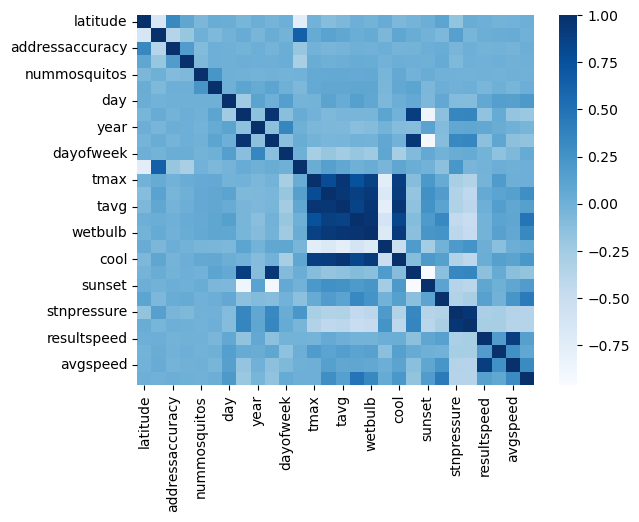

In [60]:
corr = merge_train.corr(numeric_only=True)
sns.heatmap(corr, cmap='Blues');

In [61]:
merge_train.drop(columns=['date','dewpoint','station', 'preciptotal'], inplace=True)
merge_test.drop(columns=['date','dewpoint','station', 'preciptotal'], inplace=True)

In [62]:
merge_train.shape

(8475, 28)

In [63]:
merge_test.shape

(116293, 27)

In [64]:
# Save clean datasets to dataset folder
merge_train.to_csv('../datasets/merge_train.csv', index=False)
merge_test.to_csv('../datasets/merge_test.csv', index=False)

In [65]:
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   species          8475 non-null   object 
 1   trap             8475 non-null   object 
 2   latitude         8475 non-null   float64
 3   longitude        8475 non-null   float64
 4   addressaccuracy  8475 non-null   int64  
 5   block            8475 non-null   int64  
 6   nummosquitos     8475 non-null   int64  
 7   wnvpresent       8475 non-null   int64  
 8   street           8475 non-null   object 
 9   day              8475 non-null   int32  
 10  month            8475 non-null   int32  
 11  year             8475 non-null   int32  
 12  week             8475 non-null   UInt32 
 13  dayofweek        8475 non-null   int32  
 14  tmax             8475 non-null   int64  
 15  tmin             8475 non-null   int64  
 16  tavg             8475 non-null   float64
 17  wetbulb       

In [66]:
merge_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               116293 non-null  int64  
 1   species          116293 non-null  object 
 2   block            116293 non-null  int64  
 3   street           116293 non-null  object 
 4   trap             116293 non-null  object 
 5   latitude         116293 non-null  float64
 6   longitude        116293 non-null  float64
 7   addressaccuracy  116293 non-null  int64  
 8   day              116293 non-null  int32  
 9   month            116293 non-null  int32  
 10  year             116293 non-null  int32  
 11  week             116293 non-null  UInt32 
 12  dayofweek        116293 non-null  int32  
 13  tmax             116293 non-null  int64  
 14  tmin             116293 non-null  int64  
 15  tavg             116293 non-null  float64
 16  wetbulb          116293 non-null  floa

# 4.0 Feature engineering

## 4.1 Make a copy of merge_train
We make a copy so that our EDA is not affected by the encoded data set.

In [67]:
encoded_train = merge_train.copy()
encoded_test = merge_test.copy()

## 4.2 Create new features

### 4.2.1 Use 'street' to create a new feature 'direction'.

In [68]:
# Instead of using street, we will use the north, south, east, west directions
# "  " is a special case of "   W Armitage'

encoded_train["direction"] = encoded_train["street"].str[:2]
directions = {" N": 0, " W": 1, " S": 2, " E": 3, "  ": 1}
encoded_train["direction"] = encoded_train["direction"].map(directions)

In [69]:
encoded_test["direction"] = encoded_test["street"].str[:2]
encoded_test["direction"] = encoded_test["direction"].map(directions)

In [70]:
# Check that there are no empty values caused by the new feature
encoded_train[encoded_train['direction'].isnull()][['street', 'direction']].head()

,street,direction


### 4.2.2 Use 'resultdir' to create a new feature 'winddir'.

'resultdir' is the direction of the wind given in degrees. We engineer a new feature by mapping it to directions on the 8-point compass.<br>
The 8 directions are north, north-east, north-west, south, south-east, south-west, east and west.<br>
This allows for a broader classification of wind direction.

In [71]:
resultdir_values = encoded_train['resultdir'].value_counts()

In [72]:
# Create function to map wind direction in degrees to the 8-point compass
def classify_wind_direction(result_dir_value):
    """Classify wind direction into more granular categories based on ResultDir value."""
    if 1 <= result_dir_value <= 3 or 34 <= result_dir_value <= 36:
        return 'North'
    elif 4 <= result_dir_value <= 6:
        return 'Northeast'
    elif 7 <= result_dir_value <= 9:
        return 'East'
    elif 10 <= result_dir_value <= 12:
        return 'Southeast'
    elif 13 <= result_dir_value <= 18:
        return 'South'
    elif 19 <= result_dir_value <= 21:
        return 'Southwest'
    elif 22 <= result_dir_value <= 27:
        return 'West'
    elif 28 <= result_dir_value <= 33:
        return 'Northwest'

# Apply the classification on resultdir values
wind_dir = {dir_value: classify_wind_direction(dir_value) for dir_value in resultdir_values.keys()}
wind_dir

{24: 'West',
 23: 'West',
 19: 'Southwest',
 13: 'South',
 25: 'West',
 29: 'Northwest',
 5: 'Northeast',
 17: 'South',
 21: 'Southwest',
 6: 'Northeast',
 30: 'Northwest',
 7: 'East',
 8: 'East',
 16: 'South',
 22: 'West',
 3: 'North',
 4: 'Northeast',
 10: 'Southeast',
 9: 'East',
 36: 'North',
 20: 'Southwest',
 18: 'South',
 35: 'North',
 34: 'North',
 15: 'South',
 11: 'Southeast',
 27: 'West',
 2: 'North',
 14: 'South',
 26: 'West',
 31: 'Northwest',
 12: 'Southeast',
 32: 'Northwest',
 33: 'Northwest',
 1: 'North',
 28: 'Northwest'}

In [73]:
encoded_train['winddir'] = encoded_train['resultdir'].map(wind_dir)

In [74]:
encoded_test['winddir'] = encoded_test['resultdir'].map(wind_dir)

In [75]:
# Check that there are no empty values caused by the new feature
encoded_train[encoded_train['winddir'].isnull()][['resultdir', 'winddir']].head()

,resultdir,winddir


## 4.3 Label encode species, trap and winddir

In [76]:
# Label encode species, trap and winddir

encoder = LabelEncoder()
encoder.fit(encoded_train['species'].tolist() + ["UNKNOWN"])
encoded_train['species'] = encoder.transform(encoded_train['species'])
encoded_test['species'] = encoded_test['species'].map(lambda s: s if s in encoder.classes_ else "UNKNOWN")
encoded_test['species'] = encoder.transform(encoded_test['species'])

encoder = LabelEncoder()
encoder.fit(encoded_train['trap'].tolist() + ["UNKNOWN"])
encoded_train['trap'] = encoder.transform(encoded_train['trap'])
encoded_test['trap'] = encoded_test['trap'].map(lambda s: s if s in encoder.classes_ else "UNKNOWN")
encoded_test['trap'] = encoder.transform(encoded_test['trap'])

encoder = LabelEncoder()
encoder.fit(encoded_train['winddir'].tolist() + ["UNKNOWN"])
encoded_train['winddir'] = encoder.transform(encoded_train['winddir'])
encoded_test['winddir'] = encoded_test['winddir'].map(lambda s: s if s in encoder.classes_ else "UNKNOWN")
encoded_test['winddir'] = encoder.transform(encoded_test['winddir'])

## 4.4 Saving the encoded merged train dataset and the encoded merged test dataset

In [77]:
encoded_train.to_csv('../datasets/encoded_train.csv', index=False)
encoded_test.to_csv('../datasets/encoded_test.csv', index=False)

## 4.5 Performing PCA for train dataset

In [78]:
data = pd.get_dummies(encoded_train.drop(columns=['wnvpresent','street','nummosquitos']))

In [79]:
pca = PCA(n_components=5)

In [80]:
pca.fit_transform(data)

array([[-68.50822511,   8.64800554, -16.27030112,  -1.03813542,
          9.95678567],
       [-68.70437992, -29.35123233, -30.32001015,  -1.39160651,
          9.51195688],
       [-68.68768216, -28.15487077, -20.19595299,  -1.12494263,
          9.55197468],
       ...,
       [146.24594532,  12.66168851, -28.55482009,  14.18641302,
          9.26178785],
       [146.40516249,  45.31467892, -22.9522087 ,  14.32520147,
          9.62708013],
       [146.45342364,  49.13373447,   4.44847079,  15.04416836,
          9.74265486]])

In [81]:
n = 3
print(pca.explained_variance_ratio_)
print(f"\nTop {n} principal components captures {round(100 * sum(pca.explained_variance_ratio_[0:n]),2)}% of the total variance in the dataset.")

[0.70095528 0.17293654 0.06327196 0.02968003 0.01024137]

Top 3 principal components captures 93.72% of the total variance in the dataset.


In [82]:
components = pd.DataFrame(pca.components_, columns=data.columns)
components

,species,trap,latitude,longitude,addressaccuracy,block,day,month,year,week,...,sunrise,sunset,stnpressure,sealevel,resultspeed,resultdir,avgspeed,precipbool,direction,winddir
0,-0.002383,0.004756,-0.000026,0.000021,-0.000303,0.000752,0.007212,0.012265,-0.003490,0.054867,...,0.574935,-0.814970,0.000554,0.000582,-0.003837,0.002022,-0.003277,-0.001090,0.000331,0.001611
1,0.000863,0.996677,-0.000820,0.000430,-0.010099,-0.079127,0.005343,0.000023,0.006715,0.000681,...,0.003328,0.008344,0.000177,0.000024,0.001984,0.005050,0.001248,-0.000167,0.005659,0.000233
2,-0.000307,0.079191,0.000233,-0.000580,0.007471,0.996454,0.000685,0.000685,0.002425,0.002530,...,0.008691,0.006499,-0.000386,-0.000033,-0.000686,0.006057,-0.000819,-0.000023,-0.001104,0.001705
3,0.004296,0.001844,0.000452,-0.000483,0.003063,0.025992,-0.045882,-0.011664,0.012855,-0.056669,...,-0.312291,-0.175774,0.002062,0.002575,0.007556,-0.151436,-0.006581,-0.004393,-0.003018,-0.072649
4,0.001131,0.010895,-0.000087,0.000168,-0.000775,0.001912,-0.132300,-0.002115,-0.026740,-0.028360,...,-0.600288,-0.448899,0.000498,0.000314,0.016120,-0.514997,0.002033,0.000525,0.000885,-0.046640


In [83]:
# Calculate the number of times a feature has a low loading (absolute value less than 0.2) across all principal components
low_loading_counts = (components.abs() < 0.2).sum(axis=0)

In [84]:
# List the features that have low loadings across all 5 principal components
discard_cols = low_loading_counts[low_loading_counts >= 5].index.tolist()
discard_cols

['species',
 'latitude',
 'longitude',
 'addressaccuracy',
 'day',
 'month',
 'year',
 'week',
 'dayofweek',
 'heat',
 'stnpressure',
 'sealevel',
 'resultspeed',
 'avgspeed',
 'precipbool',
 'direction',
 'winddir']

The PCA analysis is just a recommendation. After modelling several times, we have decided to not drop any columns from the PCA analysis.

# 5.0 Exploratory Data Analysis (EDA)

## 5.1 Plotting the distribution of West Nile Virus Presence

To analyze whether the west nile virus presence class is it balance or imbalance

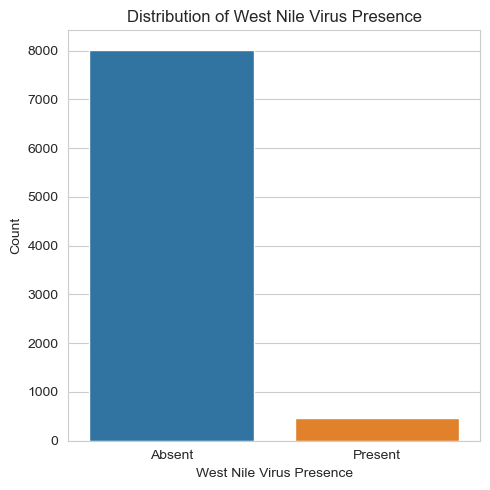

In [85]:
# setting up the visual styling
sns.set_style('whitegrid')

plt.figure(figsize=(5,5))
sns.countplot(data=merge_train, x='wnvpresent' )
plt.title('Distribution of West Nile Virus Presence')
plt.xlabel('West Nile Virus Presence')
plt.ylabel('Count')
plt.xticks([0,1],['Absent', 'Present'])

plt.tight_layout()
plt.show()

From the chart above, it shows the West Nile virus Present data were significantly lower as compare to the West Nile Virus Absent data 

## 5.2 Correlation between Weather Variables and West Nile Virus Presence

We would like find out which are the key parameters of weather that has high correlations with West Nile Virus Presence in Mosqiutoes.

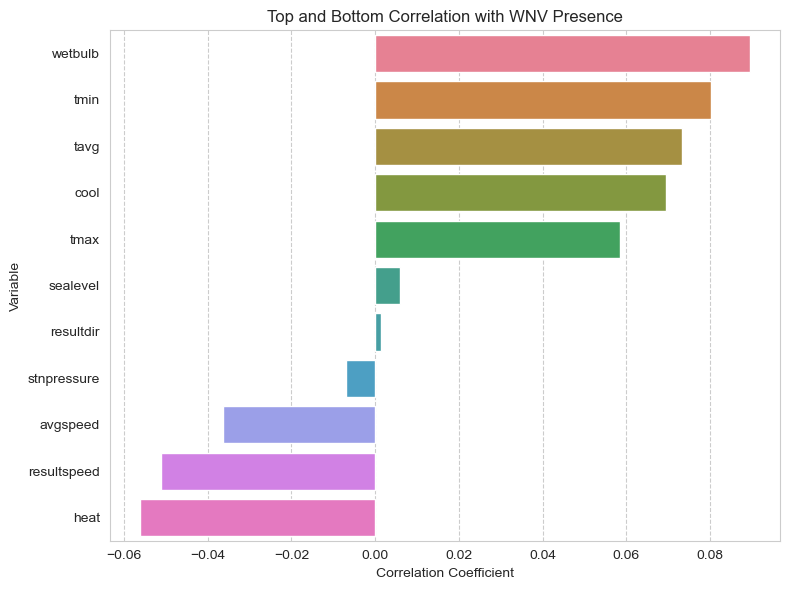

In [86]:
# Select key weather variables
weather_vars = ['tmax', 'tmin', 'tavg', 'wetbulb', 'heat', 'cool', 'stnpressure',
                'sealevel', 'resultspeed', 'resultdir', 'avgspeed']

# Formulate dataframe
merge_train_corr = merge_train[weather_vars + ['wnvpresent']]

# Compute the correlation of WNVpresence with other variables
corr_with_wnv = merge_train_corr.corr(numeric_only=True)['wnvpresent'].sort_values(ascending=False)

# Drop columne of 'wnvpresence'
corr_with_wnv.drop('wnvpresent', inplace=True)

# Plotting corr
plt.figure(figsize=(8,6))
sns.barplot(y=corr_with_wnv.index, x=corr_with_wnv.values, palette='husl')
plt.title('Top and Bottom Correlation with WNV Presence')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

###  Correlations between weather variables and West Nile Virus

- From the above chart, it shows that wetbulb and tmin has highest positive correlation with West Nile Virus. With this finding, we also have a better understanding that mosquitoes tends to thrive in humid weather and high 'tmin' temperature

- While for heat and resultspeed has lowest negative correlation with west Nile Virus. As for heat, the more amount of heat would required to maintain 65 degree F the female mosquito will not be able to consume blood. During high resultspeed period, it shows that female moqutio will look for shelter as compare to consume blood.  

## 5.3 Distribution of mosquitoes species

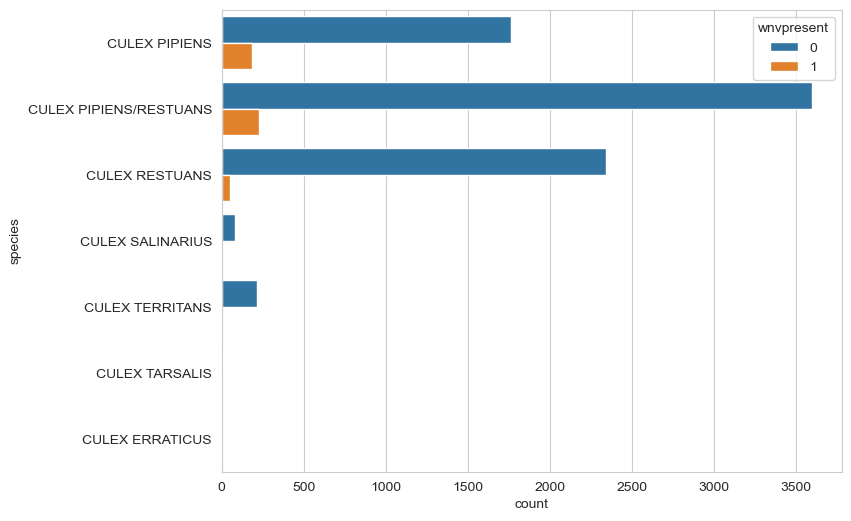

In [87]:
plt.figure(figsize=(8,6))
sns.countplot(data=train_df, y='species', hue='wnvpresent')
plt.show()

CULEX PIPIENS and CULEX PIPIENS/RESTUANS seem to be the two species with the most significant number of samples showing the presence of the virus.

## 5.4 Plotting 'nummosquitos', 'wnvpresent' and spray data vs 'week'

We would like to analyze whether the number of mosquito has an impact to the presence of West Nile Viruses.By logical assumptions the higher the number of mosqutio the higher presence of West Nile Virues should be found in mosqutioes.

We also would like to find out the number of spray times, does it bring down the mosquitos numbers and the presence of West Nile Viruses?

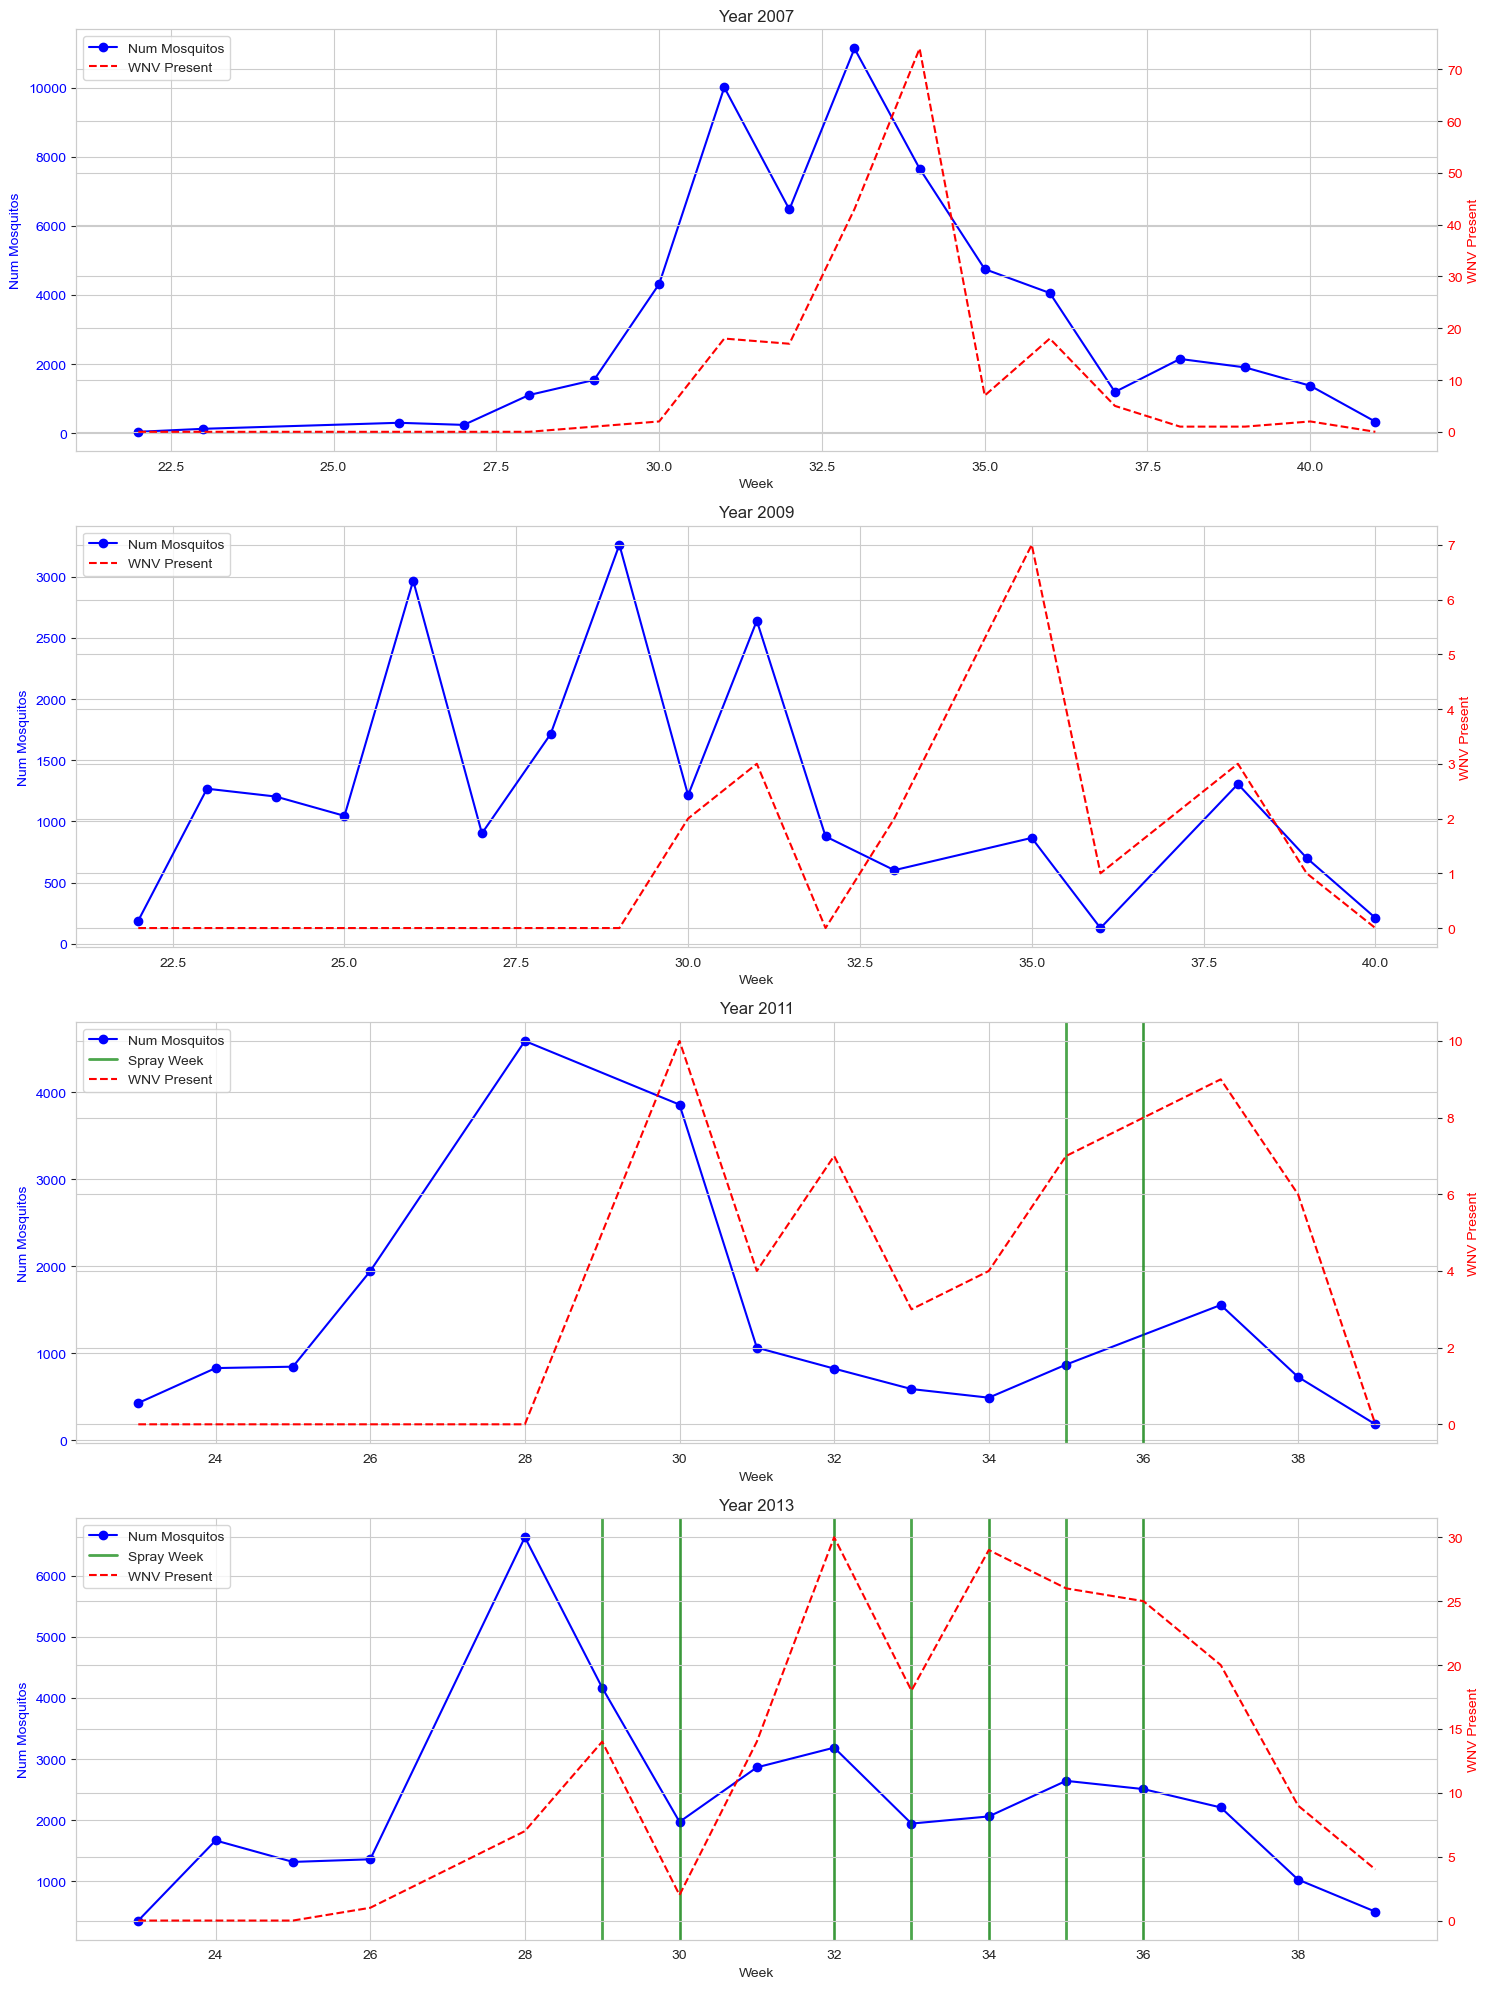

In [88]:
# groupby 'year' and 'week' and aggregate data
grouped_data = merge_train.groupby(['year', 'week']).agg({'nummosquitos':'sum', 'wnvpresent':'sum'}).reset_index()
spray_counts = spray_df.groupby(['year', 'week']).size().reset_index(name='spray_count')

# splitting the chart based on years
unique_years = grouped_data['year'].unique()
num_years = len(unique_years)
plt.figure(figsize=(15, num_years * 5))

for i, year in enumerate(unique_years, 1):
    yearly_data = grouped_data[grouped_data['year'] == year]
    yearly_spray_data = spray_counts[spray_counts['year'] == year]

    # Mosquito data
    ax1 = plt.subplot(num_years, 1, i)
    ax1.plot(yearly_data['week'], yearly_data['nummosquitos'], label='Num Mosquitos', marker='o', color='b')
    ax1.set_xlabel('Week')
    ax1.set_ylabel('Num Mosquitos', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True)

    # WNV data
    ax2 = ax1.twinx()
    ax2.plot(yearly_data['week'], yearly_data['wnvpresent'], label='WNV Present', linestyle='--', color='r')
    ax2.set_ylabel("WNV Present", color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Spray weeks
    for week in yearly_spray_data['week']:
        label = 'Spray Week' if week == yearly_spray_data['week'].iloc[0] else ""
        ax1.axvline(x=week, color='g', linestyle='-', linewidth=2, alpha=0.7, label=label)

    # Combining legends from both ax1 and ax2
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.title(f"Year {year}", ha='center')

plt.tight_layout()
plt.show()

### 'nummosquitos', 'wnvpresent' and spray data vs 'week'

According to the data, in the years 2007, 2009, 2011 and 2013, the number of mosqutioes does not have any direct impact with West Nile Virus as shown in the chart.

Is spraying useful in preventing number of mosquitoes? The answer is NO. It does not have any direct impact on the presence of West Nile Virus found in mosquitoes and number of mosquitoes caught in the trap.

## 5.5 WNV Presence Vs Month

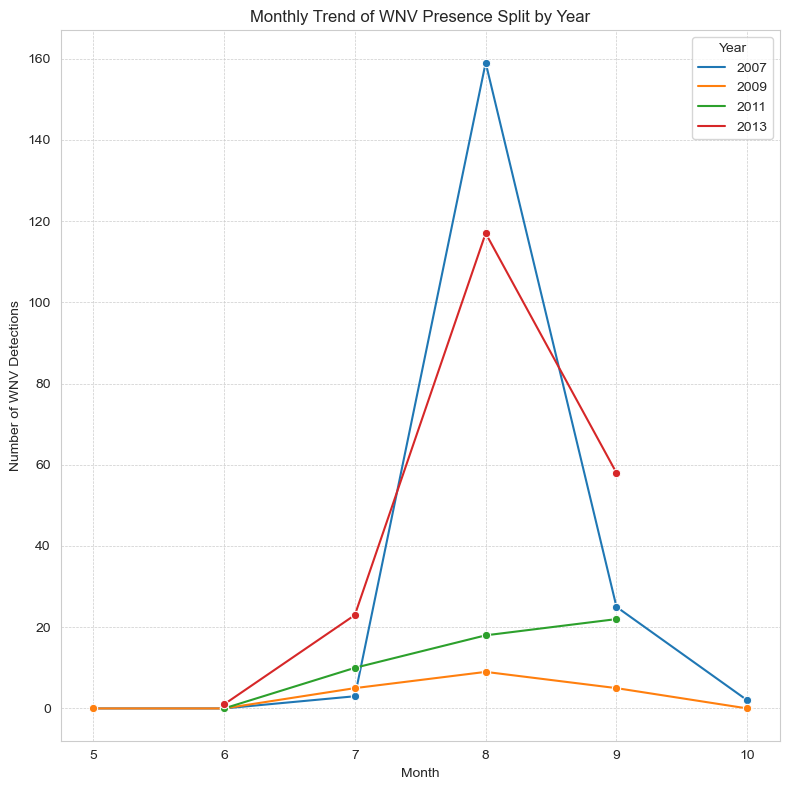

In [89]:
# Grouping by year and month to aggregate WNV presence
time_series_data = merge_train.groupby(['year', 'month'])['wnvpresent'].sum().reset_index()

# Creating a 'year_month' column for plotting
time_series_data['year_month'] = time_series_data['year'].astype(str) + '-' + time_series_data['month'].astype(str).str.zfill(2)

# Plotting the time series data by year on the same chart
plt.figure(figsize=(8, 8))
sns.lineplot(data=time_series_data, x='month', y='wnvpresent', hue='year', marker='o', palette='tab10')
plt.title('Monthly Trend of WNV Presence Split by Year')
plt.xlabel('Month')
plt.ylabel('Number of WNV Detections')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

From the chart above, the month of August always has the highest amount of West Nile virus presence.  

## 5.6 WNV Presence Vs Street Direction

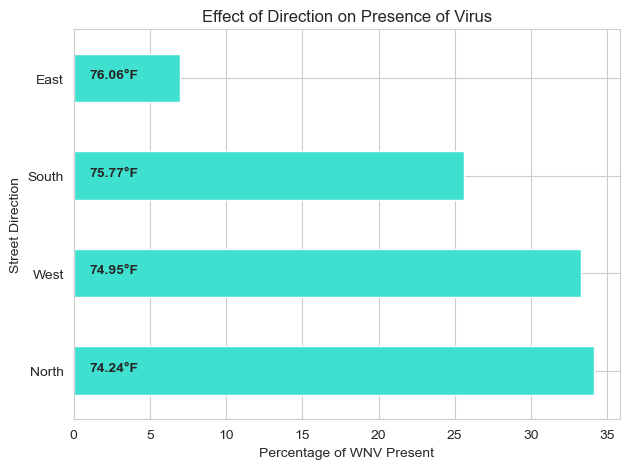

In [91]:
total = encoded_train.groupby('direction')['wnvpresent'].sum().sum()

percentages = (encoded_train.groupby('direction')['wnvpresent'].sum() * 100 / total)

tavg_values = encoded_train[encoded_train['wnvpresent'] == 1].groupby('direction')['tavg'].mean()

ax = percentages.plot(kind="barh", color="turquoise")
plt.yticks(ticks=[0, 1, 2, 3], labels=["North", "West", "South", "East"])
plt.ylabel('Street Direction')
plt.xlabel('Percentage of WNV Present')
plt.title('Effect of Direction on Presence of Virus')

for i, (percentage, tavg) in enumerate(zip(percentages, tavg_values)):
    ax.text(1, i, f"{tavg:.2f}°F", va='baseline', fontweight='bold')

plt.tight_layout()
plt.show()

From the plot above, we can see that there seems to be a correlation between street direction and presence of west nile virus.  
The plot also shows the average temperature for each street. The mosquitoes seem to thrive in lower temperatures in the north facing streets.